# Tema 3: Evaluación de algortimos de clasificación
## Cuaderno de ejercicios

**Ejercicio 1**

Supongamos que hemos utilizado un clasificador, por ejemplo, Naive Bayes, para clasificar documentos con respecto al sentimiento. Las clases son Pos (positivo), Neg (negativo) y Neu (neutro). Probamos nuestro clasificador en 10 documentos para los que conocemos su _gold standar_ (clase real). La prueba tiene los siguientes resultados:

| Documento | Clase Real | Clase predicha |
| ------------- | ------------- | ------------- |
| d1  | Pos  | Pos |
| d2  | Pos  | Pos |
| d3  | Pos  | Pos |
| d4  | Pos  | Neu |
| d5  | Neg  | Neg |
| d6  | Neg  | Neu |
| d7  | Neg  | Neg |
| d8  | Neu  | Pos |
| d9  | Neu  | Neu |
| d10  | Neu  | Neu |

Calcular: precision, recall, accuracy y F1 para estos resultados de clasificación para las tres clases.

'\naccuracy = accuracy_score(True_Values, Predicted_Values)\nprecision = precision_score(True_Values, Predicted_Values, average=None)\nrecall = recall_score(True_Values, Predicted_Values, average=None)\nf1_s = f1_score(True_Values, Predicted_Values, average=None)\n\ntable = PrettyTable()\n\ntable.field_names = ["Metric", "Neu", "Neg", "Pos", "General"]\ntable.add_row(["Accuracy", "-", "-", "-", accuracy])\ntable.add_row(["Precision", precision[0], precision[1], precision[2], "-"])\ntable.add_row(["Recall", round(recall[0],2), round(recall[1],2), round(recall[2],2), "-"])\ntable.add_row(["F1_Score", round(f1_s[0],2), round(f1_s[1],2), f1_s[2], "-"])\nprint("METRICS:")\nprint(table)\n'

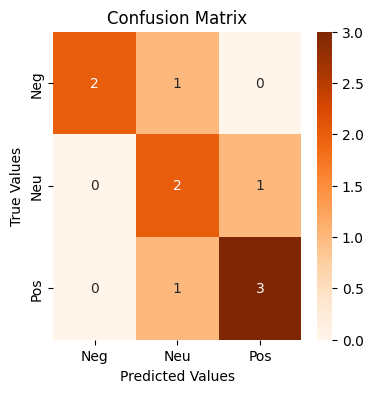

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

True_Values = ["Pos", "Pos", "Pos", "Pos", "Neg", "Neg", "Neg", "Neu", "Neu", "Neu"]
Predicted_Values = ["Pos", "Pos", "Pos", "Neu", "Neg", "Neu", "Neg", "Pos", "Neu", "Neu"]

cm = confusion_matrix(True_Values, Predicted_Values)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap="Oranges", cbar=True, xticklabels=["Neg", "Neu", "Pos"], yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')

accuracy = accuracy_score(True_Values, Predicted_Values)
precision = precision_score(True_Values, Predicted_Values, average=None)
recall = recall_score(True_Values, Predicted_Values, average=None)
f1_s = f1_score(True_Values, Predicted_Values, average=None)

table = PrettyTable()

table.field_names = ["Metric", "Neu", "Neg", "Pos", "General"]
table.add_row(["Accuracy", "-", "-", "-", accuracy])
table.add_row(["Precision", precision[0], precision[1], precision[2], "-"])
table.add_row(["Recall", round(recall[0],2), round(recall[1],2), round(recall[2],2), "-"])
table.add_row(["F1_Score", round(f1_s[0],2), round(f1_s[1],2), f1_s[2], "-"])
print("METRICS:")
print(table)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(True_Values, Predicted_Values))

              precision    recall  f1-score   support

         Neg       1.00      0.67      0.80         3
         Neu       0.50      0.67      0.57         3
         Pos       0.75      0.75      0.75         4

    accuracy                           0.70        10
   macro avg       0.75      0.69      0.71        10
weighted avg       0.75      0.70      0.71        10



**Ejercicio 2**

Se evaluó un clasificador binario utilizando un conjunto de 1000 ejemplos de prueba (test) en los que el 50 % de todos los ejemplos son negativos. El clasificador tiene 60 % de sensitivity y 70 % de accuracy. Escribe la matriz de confusión.

300.0 400.0 100.0 200.0


Text(0.5, 1.0, 'Confusion Matrix')

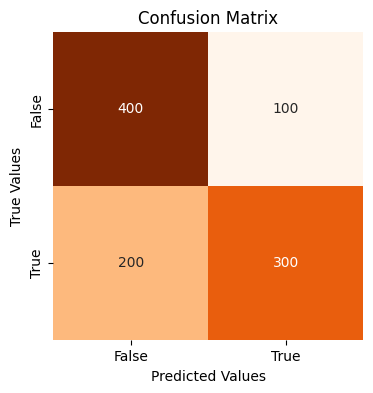

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

TOTAL = 1000
Sensivity = 0.6
Accuracy = 0.7
TP_FN = TOTAL / 2
TN_FP = TOTAL / 2
TP = Sensivity * TP_FN
FN = TP_FN - TP
TN = (Accuracy * (TP_FN + TN_FP)) - TP
FP = TN_FP - TN

True_Values = [1] * int(TP) + [0] * int(FN) + [0] * int(TN) + [1] * int(FP) 
Predicted_Values = [1] * 500 + [0] * 500
print(TP, TN, FP, FN)

cm = confusion_matrix(Predicted_Values, True_Values)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", cbar=False, xticklabels = ["False", "True"], yticklabels = ["False", "True"])

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')

**Ejercicio 3**

Utilizando la matriz de confusión creada en el ejercicio anterior, calcula la precisión del clasificador, la medida F1 y
especificidad.

In [80]:
accuracy = accuracy_score(True_Values, Predicted_Values)
precision = precision_score(True_Values, Predicted_Values, average=None)
recall = recall_score(True_Values, Predicted_Values, average=None)
f1_s = f1_score(True_Values, Predicted_Values, average=None)

table = PrettyTable()

table.field_names = ["Metric", "False", "True", "General"]
table.add_row(["Accuracy", "-", "-", accuracy])
table.add_row(["Precision", precision[0], precision[1], "-"])
table.add_row(["Recall", round(recall[0],2), round(recall[1],2), "-"])
table.add_row(["F1_Score", round(f1_s[0],2), round(f1_s[1],2), "-"])
print("METRICS:")
print(table)

print("\nCLASSIFICATION REPORT:")
print(classification_report(True_Values, Predicted_Values))

METRICS:
+-----------+-------+------+---------+
|   Metric  | False | True | General |
+-----------+-------+------+---------+
|  Accuracy |   -   |  -   |   0.7   |
| Precision |  0.8  | 0.6  |    -    |
|   Recall  |  0.67 | 0.75 |    -    |
|  F1_Score |  0.73 | 0.67 |    -    |
+-----------+-------+------+---------+

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       600
           1       0.60      0.75      0.67       400

    accuracy                           0.70      1000
   macro avg       0.70      0.71      0.70      1000
weighted avg       0.72      0.70      0.70      1000

